In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [13]:
dft200f = pd.read_csv('02_21_Wifi_FogComputing/Cloud/Perf/cf200.csv')
dft200f  ["alarmas"]= "200"

dft400f = pd.read_csv('02_21_Wifi_FogComputing/Cloud/Perf/cf400.csv')
dft400f  ["alarmas"]= "400"

dft600f = pd.read_csv('02_21_Wifi_FogComputing/Cloud/Perf/cf600.csv')
dft600f  ["alarmas"]= "600"

dft800f = pd.read_csv('02_21_Wifi_FogComputing/Cloud/Perf/cf800.csv')
dft800f  ["alarmas"]= "800"

dft1000f = pd.read_csv('02_21_Wifi_FogComputing/Cloud/Perf/cf1000.csv')
dft1000f  ["alarmas"]= "1000"

dft1200f = pd.read_csv('02_21_Wifi_FogComputing/Cloud/Perf/cf1200.csv')
dft1200f  ["alarmas"]= "1200"

In [16]:
dft200c = pd.read_csv('02_21_Wifi_CloudComputing/perfcpu2/c200.csv')
dft200c  ["alarmas"]= "200"

dft400c = pd.read_csv('02_21_Wifi_CloudComputing/perfcpu2/c400.csv')
dft400c  ["alarmas"]= "400"

dft600c = pd.read_csv('02_21_Wifi_CloudComputing/perfcpu2/c600.csv')
dft600c  ["alarmas"]= "600"

dft800c = pd.read_csv('02_21_Wifi_CloudComputing/perfcpu2/c800.csv')
dft800c  ["alarmas"]= "800"

dft1000c = pd.read_csv('02_21_Wifi_CloudComputing/perfcpu2/c1000.csv')
dft1000c  ["alarmas"]= "1000"

dft1200c = pd.read_csv('02_21_Wifi_CloudComputing/perfcpu2/c1200.csv')
dft1200c  ["alarmas"]= "1200"

In [17]:
def Append6andCast(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6, O_column, simbol,value):
    mdtf1 = Append6(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6)
    mdtf1[O_column] = CastOutLayers(mdtf1, O_column, simbol,value)
    return mdtf1

def Append6(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    return mdtf1.append(mdtf6)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='alarmas', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def GetCutdf(mdfpost,column,signo,val):
    if signo == '<':
        return  mdfpost[mdfpost[column] < val ][[column,'alarmas']].reset_index(drop=True)
    else:
        return  mdfpost[mdfpost[column] > val ][[column,'alarmas']].reset_index(drop=True)
    
def AppendAndPlot(ndf,O_column, N_column, simbol, value, morder):
    ndf = Append2(df1, df2, df3, df4,df5,df6).reset_index(drop=True)
    ndf[N_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,N_column,morder)

def getMean(df1,df2,df3,df4,df5,df6,N_column):
    return [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),
            df4[N_column].mean(),df5[N_column].mean(),df6[N_column].mean()]

def CastAndPlot2(df1,df2,N_column1,N_column2,yLabel,morder):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,df1)
    plt.plot(morder,df2)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend([N_column1,N_column2], loc='upper center')
    plt.xticks(np.arange(200, 1400, step=200))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(yLabel)
    plt.savefig('4G_O.eps', format='eps', dpi=1000)

# Cloud Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


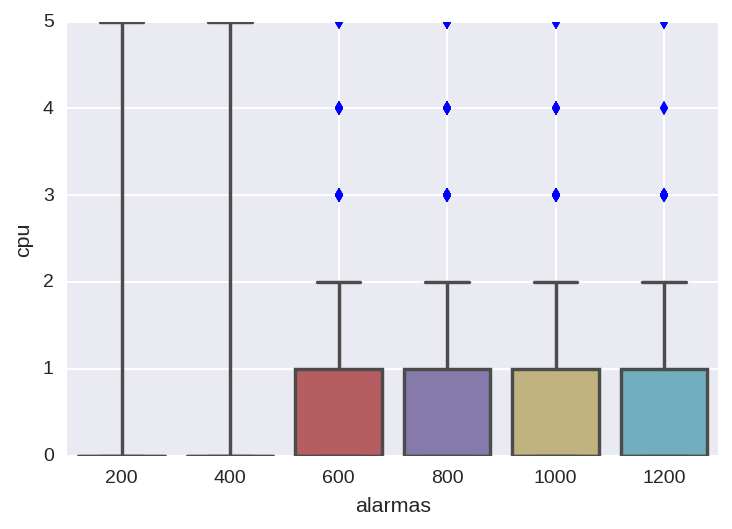

In [21]:
dft = Append6andCast(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"cpu","<",5)
Plotbox(dft,"cpu",morder)

# Fog Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


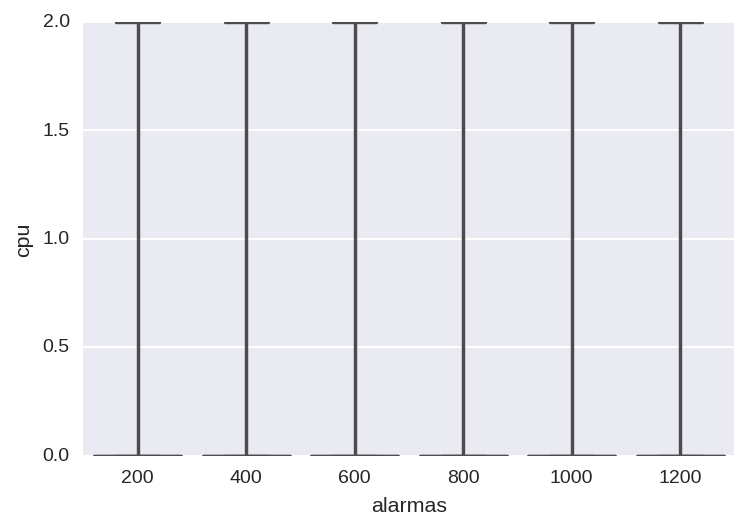

In [22]:
dft = Append6andCast(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"cpu","<",5)
Plotbox(dft,"cpu",morder)

In [9]:
morder=["200","400","600","800","1000","1200"]

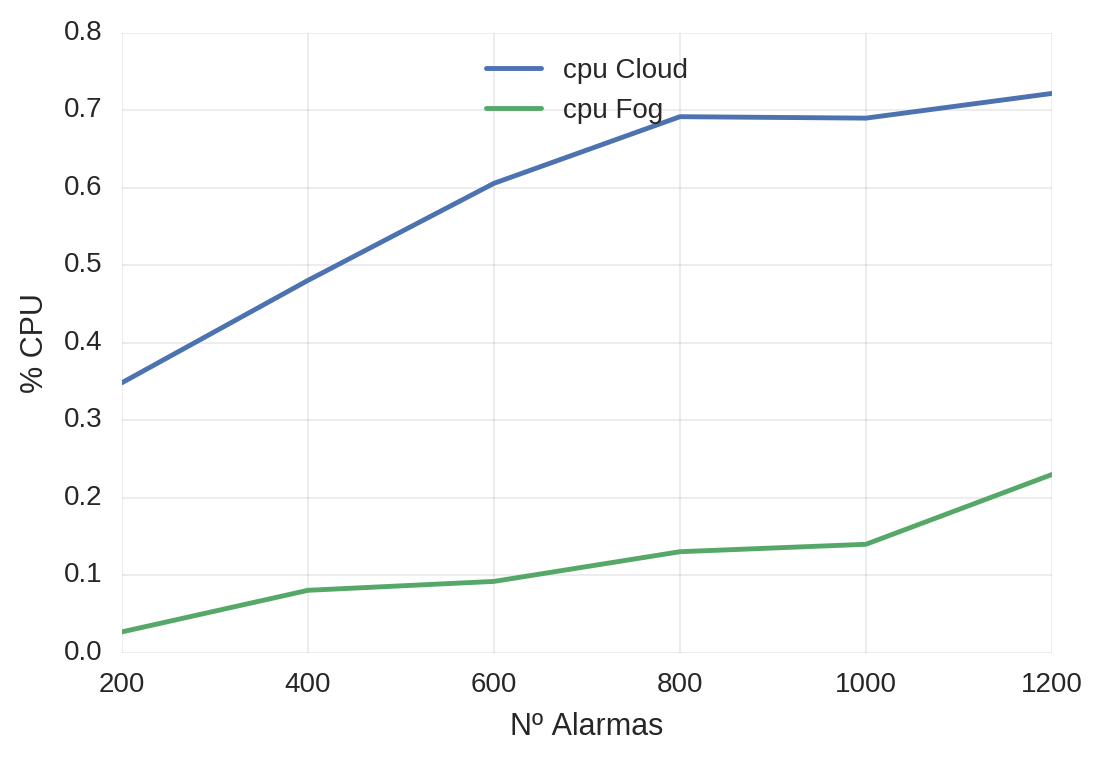

In [19]:
ldftcc = getMean(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"cpu")
ldftfc = getMean(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"cpu")
CastAndPlot2(ldftcc,ldftfc,"cpu Cloud","cpu Fog","% CPU",morder)

# Cloud Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


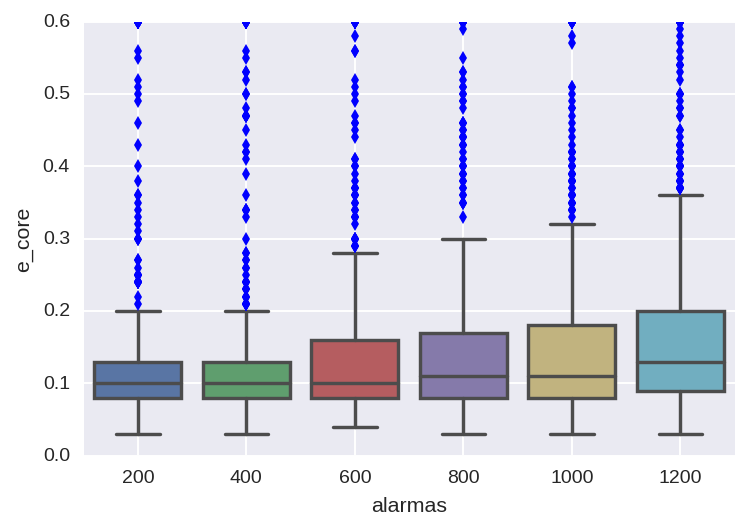

In [23]:
dft = Append6andCast(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"e_core","<",0.6)
Plotbox(dft,"e_core",morder)

# Fog Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


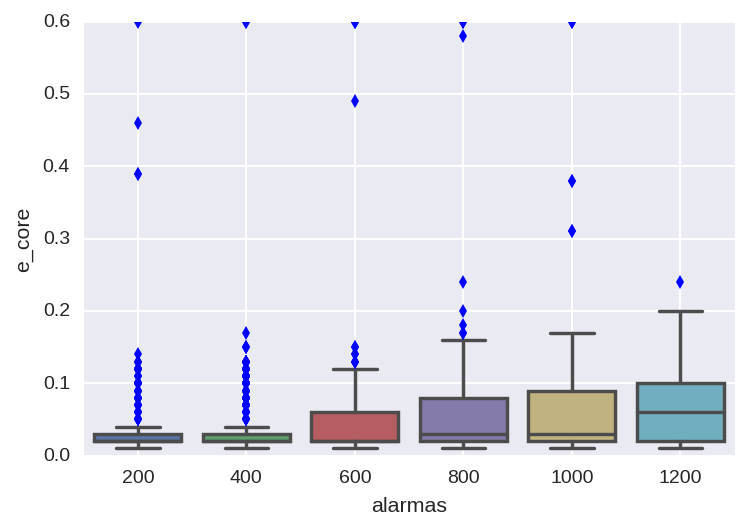

In [26]:
dft = Append6andCast(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"e_core","<",0.6)
Plotbox(dft,"e_core",morder)

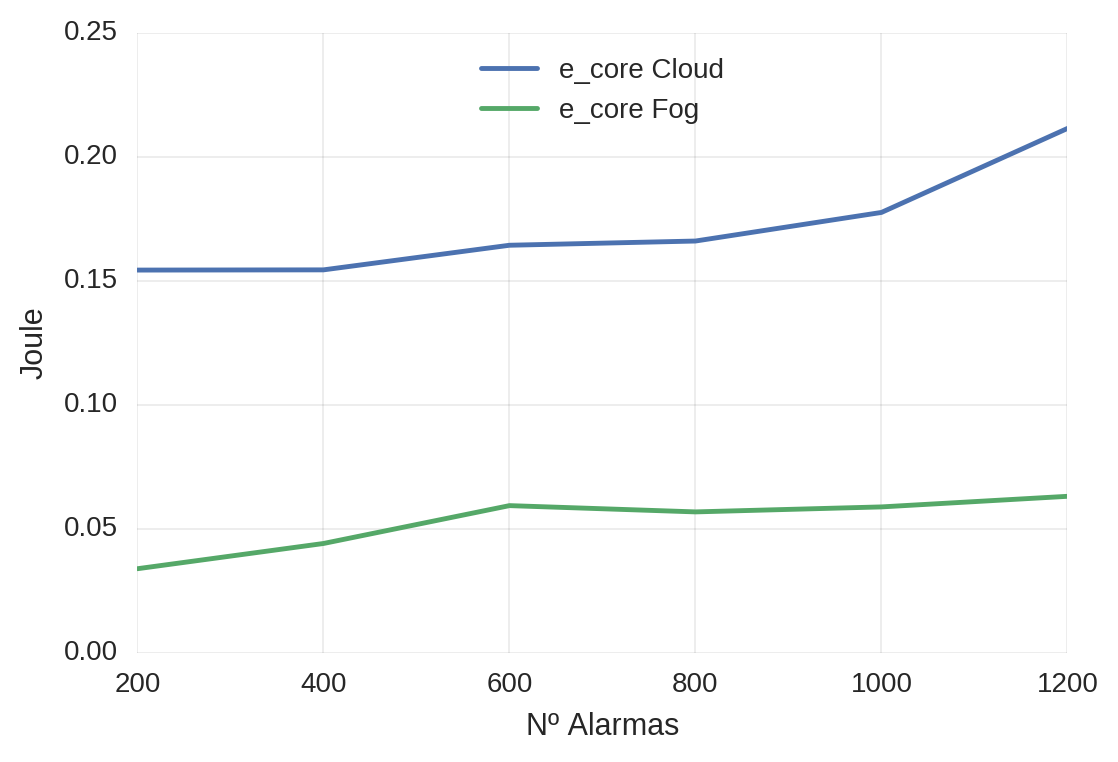

In [27]:
ldftcc = getMean(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"e_core")
ldftfc = getMean(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"e_core")
CastAndPlot2(ldftcc,ldftfc,"e_core Cloud","e_core Fog","Joule",morder)

# Cloud Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


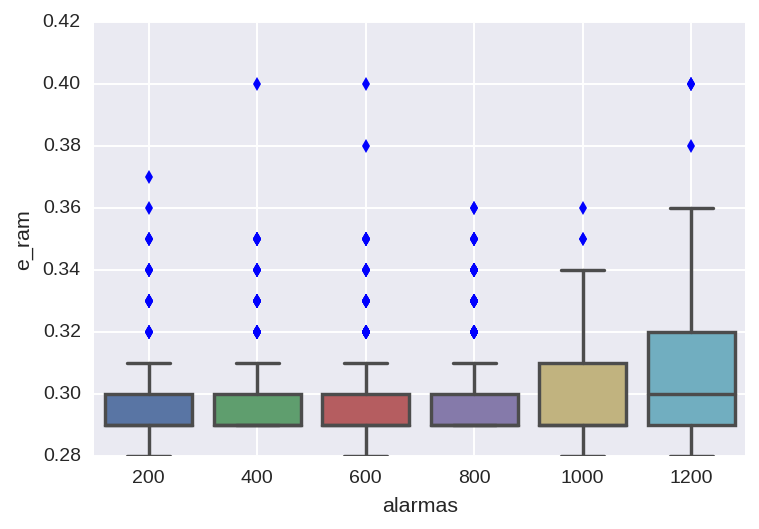

In [28]:
dft = Append6andCast(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"e_ram","<",0.4)
Plotbox(dft,"e_ram",morder)

# Fog Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


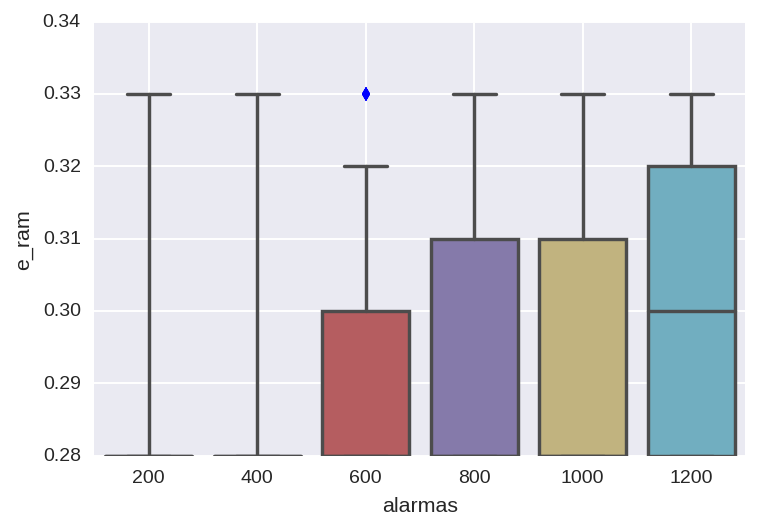

In [29]:
dft = Append6andCast(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"e_ram","<",0.4)
Plotbox(dft,"e_ram",morder)

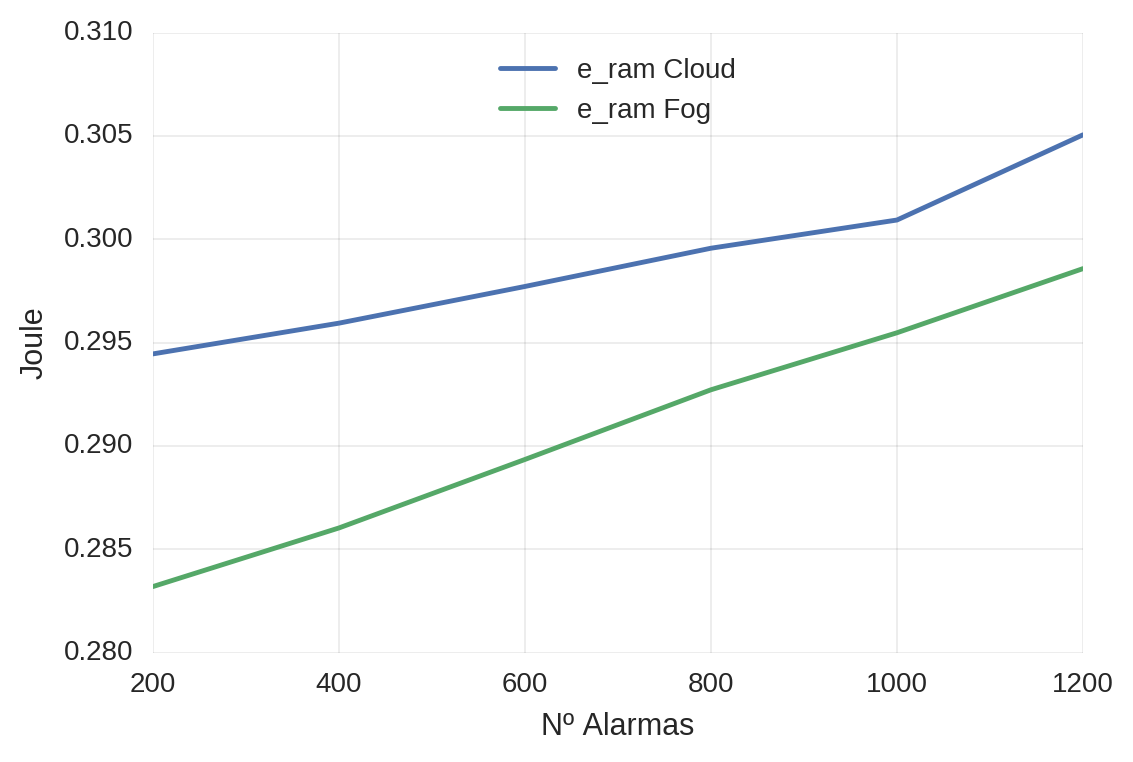

In [30]:
ldftcc = getMean(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"e_ram")
ldftfc = getMean(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"e_ram")
CastAndPlot2(ldftcc,ldftfc,"e_ram Cloud","e_ram Fog","Joule",morder)

# Cloud Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


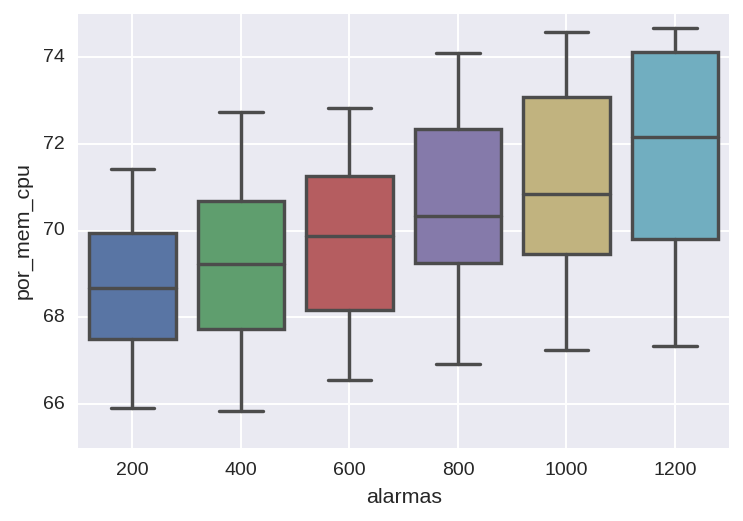

In [31]:
dft = Append6andCast(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"mem_used","<",9000000)
dft["por_mem_cpu"] = 100-100*dft["mem_used"]/8033560
Plotbox(dft,"por_mem_cpu",morder)

# Fog Computing

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


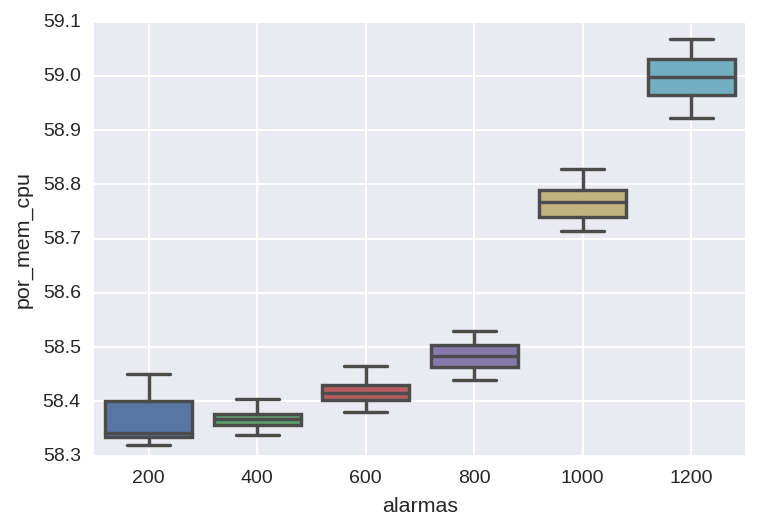

In [32]:
dft = Append6andCast(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"mem_used","<",9000000)
dft["por_mem_cpu"] = 100-100*dft["mem_used"]/8033560
Plotbox(dft,"por_mem_cpu",morder)

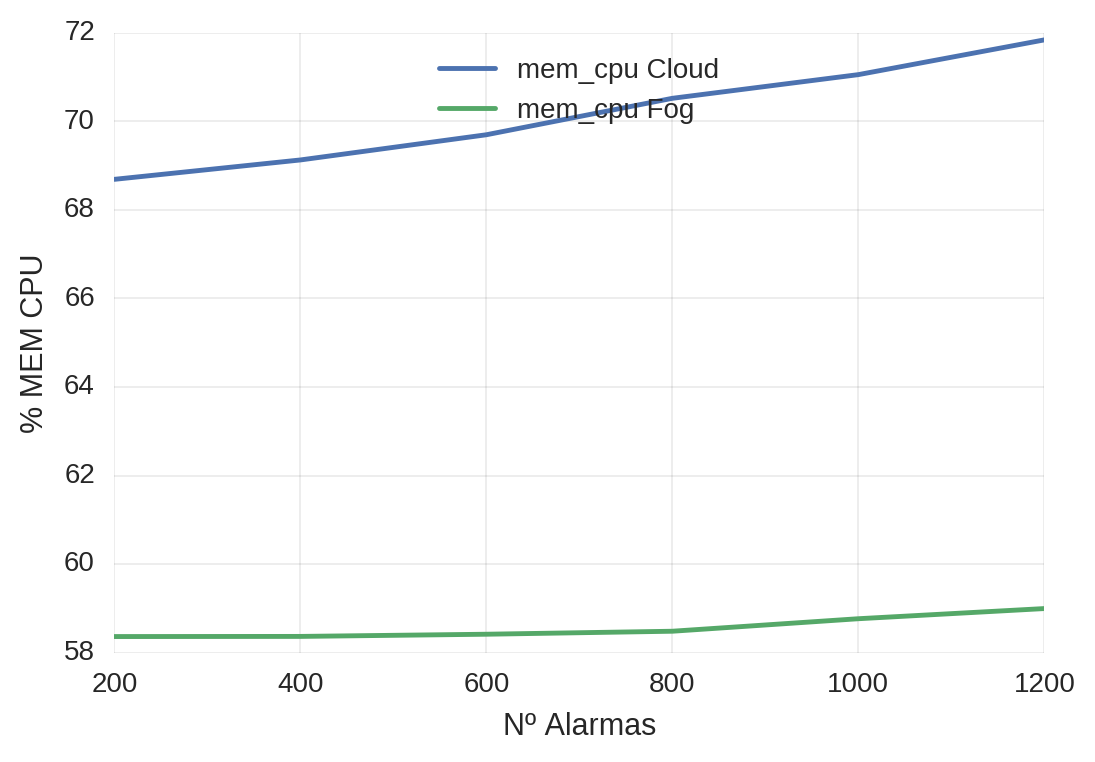

In [34]:
ldftcc = getMean(dft200c, dft400c, dft600c, dft800c, dft1000c, dft1200c,"mem_used")
ldftfc = getMean(dft200f, dft400f, dft600f, dft800f, dft1000f, dft1200f,"mem_used")
for i in range(len(ldftfc)):
    ldftcc[i] = 100-100*ldftcc[i]/8033560
    ldftfc[i] = 100-100*ldftfc[i]/8033560
CastAndPlot2(ldftcc,ldftfc,"mem_cpu Cloud","mem_cpu Fog","% MEM CPU",morder)